<a href="https://colab.research.google.com/github/ArchXOX/PRODIGY_DS_02/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation and cleaning

In [ ]:
#Importing data
%cd /content/drive/MyDrive/TASK 2

/content/drive/MyDrive/TASK 2


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [ ]:
#Data
df=pd.read_csv('/content/drive/MyDrive/TASK 2/Virtual_Reality_in_Education_Impact.csv')
df.head()

,Student_ID,Age,Gender,Grade_Level,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Subject,Instructor_VR_Proficiency,Perceived_Effectiveness_of_VR,Access_to_VR_Equipment,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Feedback_from_Educators_on_VR,Interest_in_Continuing_VR_Based_Learning,Region,School_Support_for_VR_in_Curriculum
0,STUD0001,13,Non-binary,Postgraduate,Science,No,6,1,Yes,Computer Science,Intermediate,3,Yes,5,High,No,Neutral,No,South America,No
1,STUD0002,16,Non-binary,Undergraduate,Medicine,No,6,1,Yes,Math,Beginner,2,Yes,3,Low,Yes,Positive,No,Oceania,No
2,STUD0003,15,Prefer not to say,High School,Science,No,4,5,Yes,Art,Advanced,5,Yes,2,Low,Yes,Neutral,Yes,Oceania,No
3,STUD0004,24,Female,Postgraduate,Engineering,Yes,2,4,No,Economics,Beginner,5,No,3,High,No,Neutral,No,Europe,Yes
4,STUD0005,22,Non-binary,Undergraduate,Arts,Yes,10,3,No,Art,Beginner,4,Yes,1,Medium,No,Negative,Yes,North America,Yes


In [ ]:
#Picking important variables
data=df[['Field_of_Study','Usage_of_VR_in_Education','Hours_of_VR_Usage_Per_Week','Engagement_Level','Improvement_in_Learning_Outcomes',
         'Instructor_VR_Proficiency','Impact_on_Creativity','Stress_Level_with_VR_Usage','Collaboration_with_Peers_via_VR',
         'Region','Perceived_Effectiveness_of_VR']]
data.head()

,Field_of_Study,Usage_of_VR_in_Education,Hours_of_VR_Usage_Per_Week,Engagement_Level,Improvement_in_Learning_Outcomes,Instructor_VR_Proficiency,Impact_on_Creativity,Stress_Level_with_VR_Usage,Collaboration_with_Peers_via_VR,Region,Perceived_Effectiveness_of_VR
0,Science,No,6,1,Yes,Intermediate,5,High,No,South America,3
1,Medicine,No,6,1,Yes,Beginner,3,Low,Yes,Oceania,2
2,Science,No,4,5,Yes,Advanced,2,Low,Yes,Oceania,5
3,Engineering,Yes,2,4,No,Beginner,3,High,No,Europe,5
4,Arts,Yes,10,3,No,Beginner,1,Medium,No,North America,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Field_of_Study                    5000 non-null   object
 1   Usage_of_VR_in_Education          5000 non-null   object
 2   Hours_of_VR_Usage_Per_Week        5000 non-null   int64 
 3   Engagement_Level                  5000 non-null   int64 
 4   Improvement_in_Learning_Outcomes  5000 non-null   object
 5   Instructor_VR_Proficiency         5000 non-null   object
 6   Impact_on_Creativity              5000 non-null   int64 
 7   Stress_Level_with_VR_Usage        5000 non-null   object
 8   Collaboration_with_Peers_via_VR   5000 non-null   object
 9   Region                            5000 non-null   object
 10  Perceived_Effectiveness_of_VR     5000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


# Exploratory data analysis

In [ ]:
data.describe()

,Hours_of_VR_Usage_Per_Week,Engagement_Level,Impact_on_Creativity,Perceived_Effectiveness_of_VR
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.025400,3.021400,3.019600,2.951600
std,3.140816,1.427358,1.437508,1.417625
min,0.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,5.000000,3.000000,3.000000,3.000000
75%,8.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000


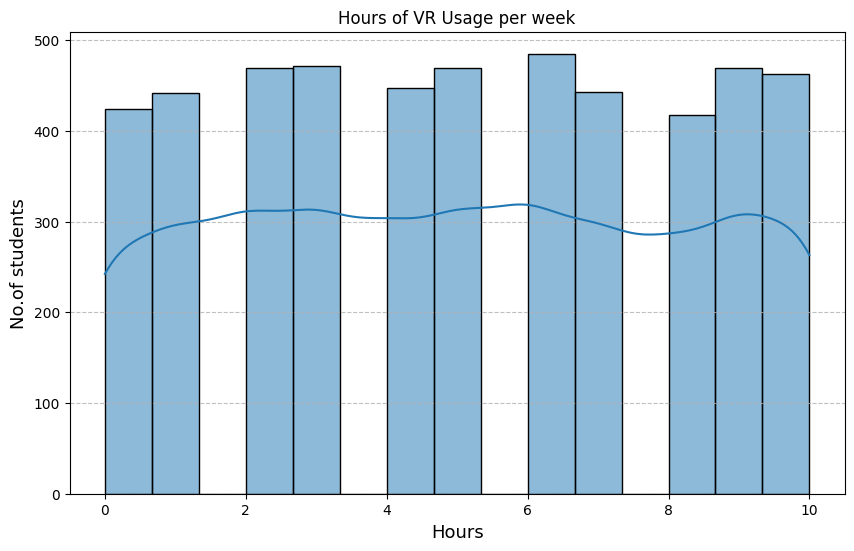

In [ ]:
#Histogram
#Hours_of_VR_Usage_Per_Week
plt.figure(figsize=(10,6))
sns.histplot(df['Hours_of_VR_Usage_Per_Week'],kde=True)
plt.title('Hours of VR Usage per week')
plt.xlabel('Hours',fontsize=13)
plt.ylabel('No.of students',fontsize=13)
plt.grid(axis='y',linestyle='--',alpha=0.8)
plt.show()


From the histogram, we can infer that :

1)The data is symmetric.

2) The maximum amount of time students use VR is 6 hours.

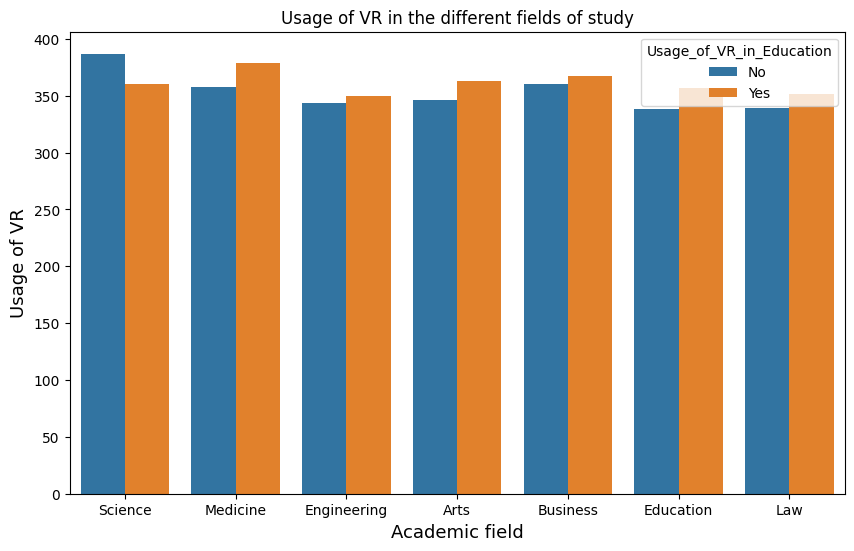

In [ ]:
#Barplot
#Field_of_Study
plt.figure(figsize=(10,6))
sns.countplot(x='Field_of_Study',hue='Usage_of_VR_in_Education',data=data)
plt.title("Usage of VR in the different fields of study")
plt.xlabel('Academic field',fontsize=13)
plt.ylabel('Usage of VR',fontsize=13)
plt.show()

From the given graph, we can infer that :

1) All fields of eduction, except Science accept the usage of VR to improve the quality of learning. This could be because, Science is more of a practical field, bounded by strict methodologies of imparting knowledge.

<ipython-input-89-78a47f836103>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stress_Level_with_VR_Usage',data=data,palette='Set2')


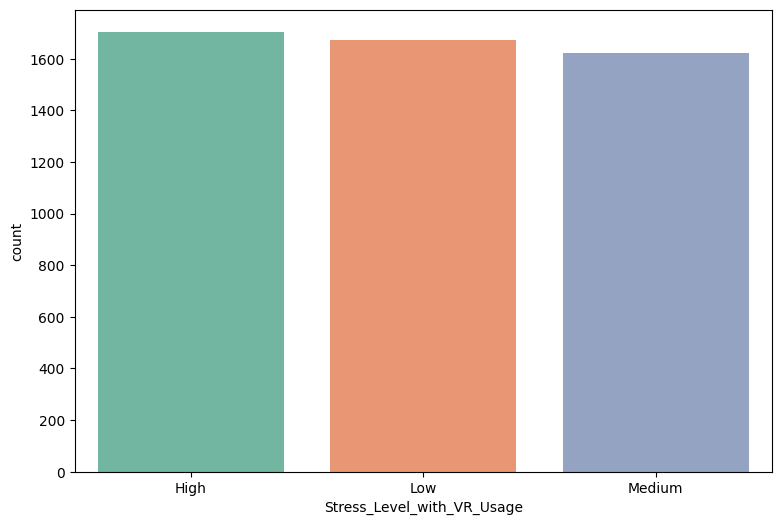

In [ ]:
#Barplot
#Stress_Level_with_VR_Usage
plt.figure(figsize=(9,6))
sns.countplot(x='Stress_Level_with_VR_Usage',data=data,palette='Set2')
plt.show()

<ipython-input-90-2bd1b3a24d7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Field_of_Study',y='Hours_of_VR_Usage_Per_Week',data=df,palette='Set3')


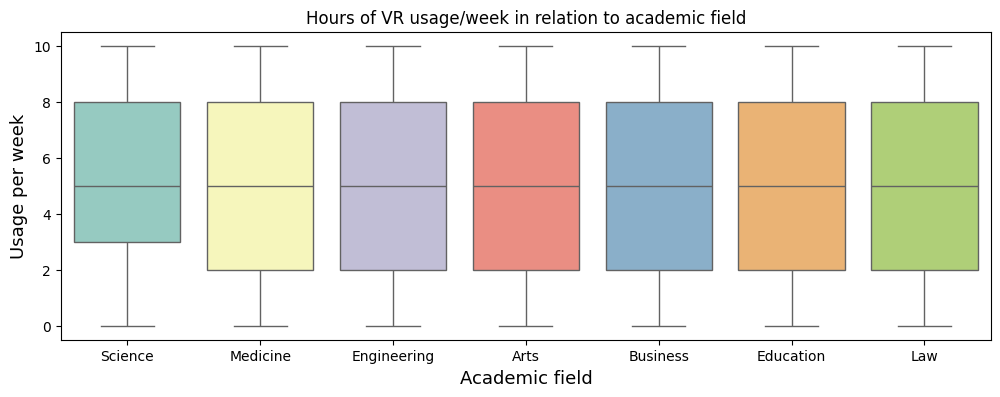

In [ ]:
#Boxplot
#Usage_of_VR_in_Education and Improvement_in_Learning_Outcomes
plt.figure(figsize=(12,4))
sns.boxplot(x='Field_of_Study',y='Hours_of_VR_Usage_Per_Week',data=df,palette='Set3')
plt.title('Hours of VR usage/week in relation to academic field')
plt.xlabel('Academic field',fontsize=13)
plt.ylabel('Usage per week',fontsize=13)
plt.show()

From the boxplot, we can infer that:

1) Based on the middle line, most of the academic fields have a standard usage of VR per week, which is 5 hours.

2) Based on the size of the box, the field of Science has less variablility in usage of VR compared to the other disciplines.

# Data analysis

In [ ]:
#Converting categorical variables into numeric
encoder = LabelEncoder()

data['Improvement_in_Learning_Outcomes_Encoded'] = encoder.fit_transform(data['Improvement_in_Learning_Outcomes'])
data['Improvement_in_Learning_Outcomes']=pd.to_numeric(data['Improvement_in_Learning_Outcomes_Encoded'])

data['Stress_Level_with_VR_Usage_Encoded'] = encoder.fit_transform(data['Stress_Level_with_VR_Usage'])
data['Stress_Level_with_VR_Usage']=pd.to_numeric(data['Stress_Level_with_VR_Usage_Encoded'])

<ipython-input-91-6a57ab9addd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Improvement_in_Learning_Outcomes_Encoded'] = encoder.fit_transform(data['Improvement_in_Learning_Outcomes'])
<ipython-input-91-6a57ab9addd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Improvement_in_Learning_Outcomes']=pd.to_numeric(data['Improvement_in_Learning_Outcomes_Encoded'])
<ipython-input-91-6a57ab9addd1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
data_co=data[['Improvement_in_Learning_Outcomes','Hours_of_VR_Usage_Per_Week','Impact_on_Creativity',
              'Perceived_Effectiveness_of_VR','Stress_Level_with_VR_Usage']]
data_co.cov()

,Improvement_in_Learning_Outcomes,Hours_of_VR_Usage_Per_Week,Impact_on_Creativity,Perceived_Effectiveness_of_VR,Stress_Level_with_VR_Usage
Improvement_in_Learning_Outcomes,0.250044,0.004040,-0.002848,0.011318,0.002841
Hours_of_VR_Usage_Per_Week,0.004040,9.864728,0.042711,0.014832,0.032833
Impact_on_Creativity,-0.002848,0.042711,2.066429,0.014952,-0.010673
Perceived_Effectiveness_of_VR,0.011318,0.014832,0.014952,2.009659,-0.010215
Stress_Level_with_VR_Usage,0.002841,0.032833,-0.010673,-0.010215,0.665051


Inferences:

1) Improvement in learning outcomes negativity impacts creativity

2) Impact on creativity and stress level have negative covariance. The more stress levels due to VR impacts the student's creativity.

3) Percieved effectiveness of VR and stress levels have negative covariance. This could be because, the more stress students' undertake because of VR, the less they benefit from its effectiveness.

4) Stress levels due to VR increases with increase in its usage per week.

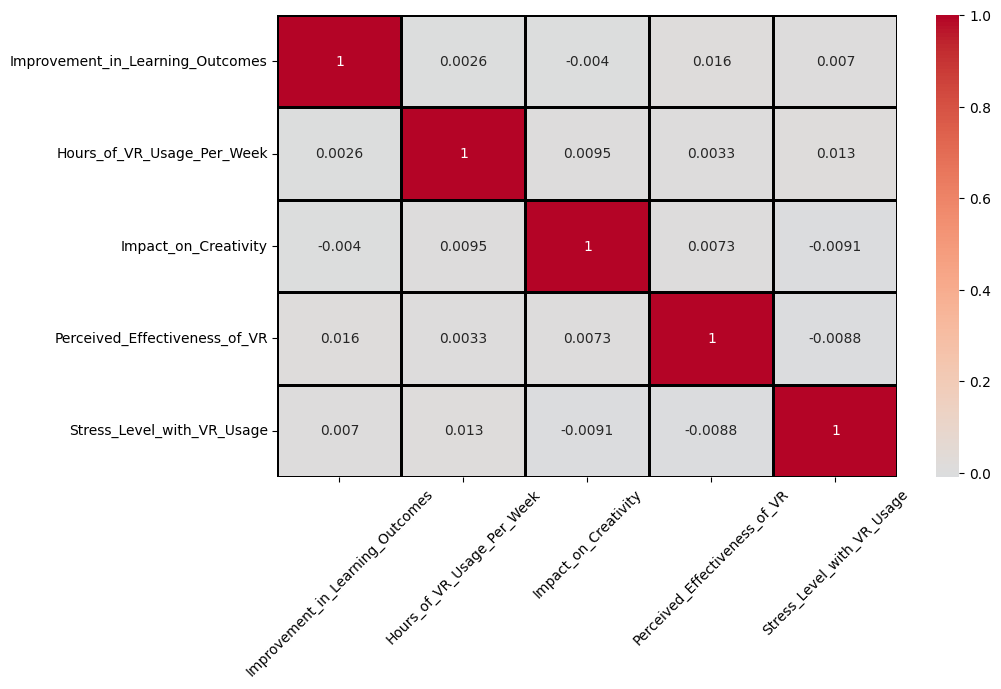

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_co.corr(),annot=True,cmap='coolwarm',center=0,linewidth=1,linecolor='black')
plt.xticks(rotation=45)
plt.show()

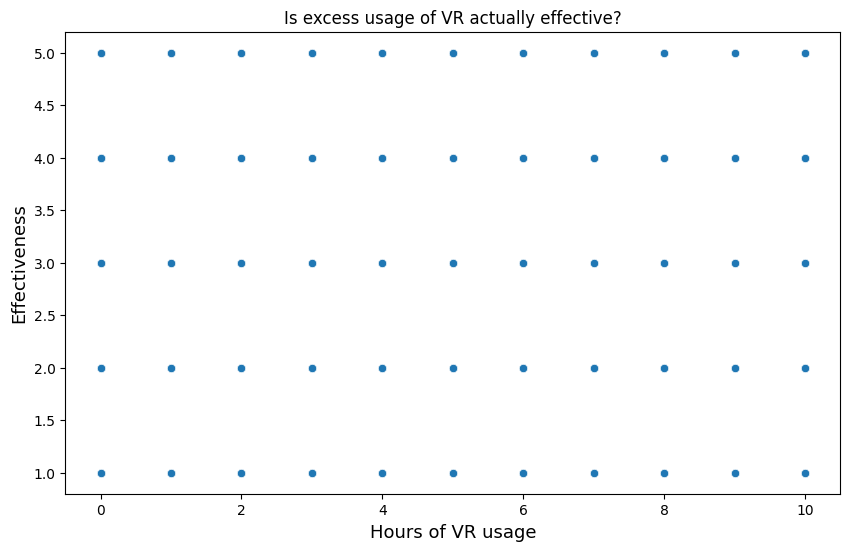

In [ ]:
#Scatter plot
#Impact_on_Creativity and Stress_Level_with_VR_Usage
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Hours_of_VR_Usage_Per_Week'],y=data['Perceived_Effectiveness_of_VR'],data=data)
plt.title('Is excess usage of VR actually effective?')
plt.xlabel('Hours of VR usage',fontsize=13)
plt.ylabel('Effectiveness',fontsize=13)
plt.show()

From the above scatterplot, we can see that there is no pattern following the two variables. Hence we can conclude that there is no clear relationship between usage of VR and its effectiveness.

# Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean squared error is : 0.50
R-squared is : -0.01
MAE: 0.50


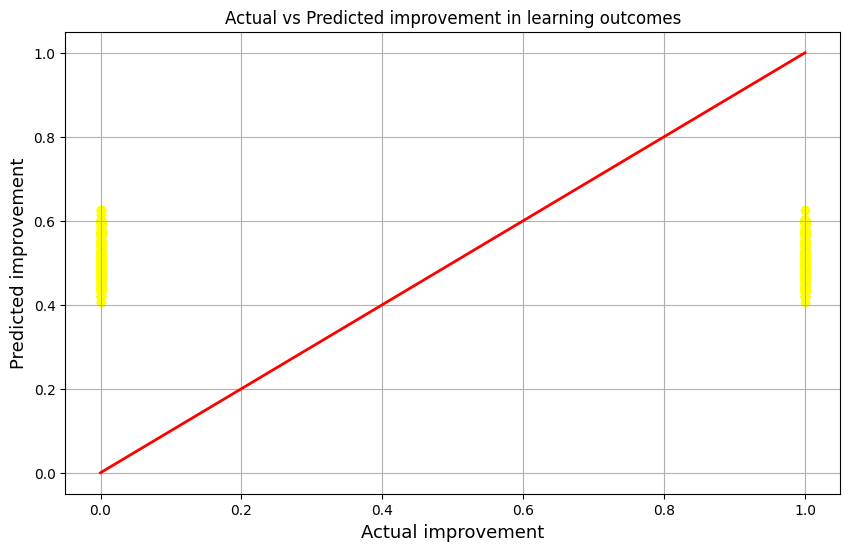

In [ ]:
#Actual vs predicted plot - Linear regression
X=df[['Hours_of_VR_Usage_Per_Week','Instructor_VR_Proficiency','Collaboration_with_Peers_via_VR','Engagement_Level']]
y=df['Improvement_in_Learning_Outcomes']

#Converting categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(X)

label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(y)

#Adding constant
X=sm.add_constant(X)

#Train-test splitting
X_train,X_test,y_train,y_test=train_test_split(encoded_features,encoded_target,test_size=0.2,random_state=42)

#Fitting the model
model=LinearRegression()
model.fit(X_train,y_train)

#Predicted values
y_pred=model.predict(X_test)

#Accuracy assessement
mse=mean_squared_error(y_test,y_pred,squared = False)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)

print(f"Mean squared error is : {mse:.2f}")
print(f"R-squared is : {r2:.2f}")
print(f"MAE: {mae:.2f}")

#Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='yellow')
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', linewidth=2)
plt.title("Actual vs Predicted improvement in learning outcomes")
plt.xlabel("Actual improvement",fontsize=13)
plt.ylabel("Predicted improvement",fontsize=13)

plt.grid()
plt.show()


Graph:
Due to absence of clear pattern between actual and predicted values, we can say that the model is ineffective and a poor fit to the data.
Model is not able to accurately make predictions on the actual outcome.
The model is not able to properly establish the underlying relationship in the data.

Accuracy measures:
Low r-squared value indicates towards a poor fitting model.

Since MSE(mean squared error) and MAE(mean absolute error) are equal, we can say that the errors are relatively consistent with not many outliers affecting the results.


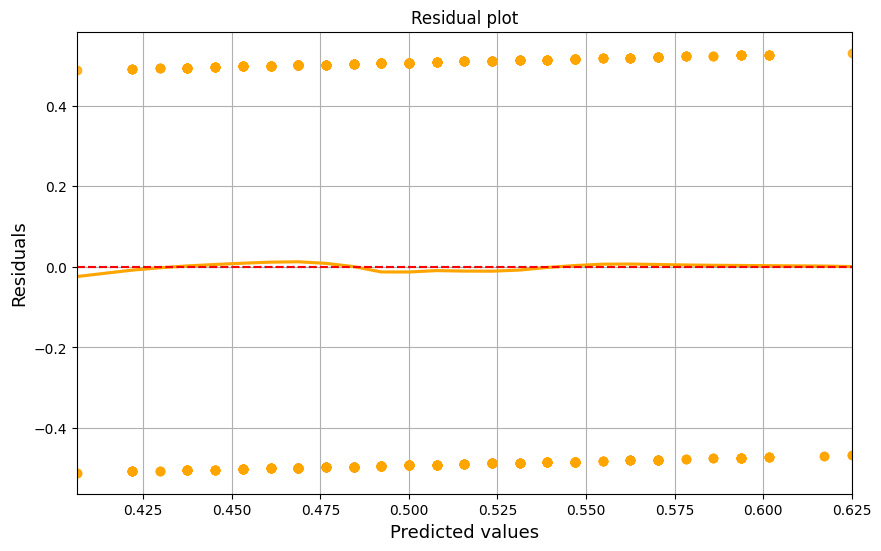

In [ ]:
#Residual plot
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred,y=y_test-y_pred,lowess=True,color='orange')
plt.title('Residual plot')
plt.xlabel('Predicted values',fontsize=13)
plt.ylabel('Residuals',fontsize=13)
plt.axhline(y=0,color='red',linestyle='--')

plt.grid()
plt.show()



A residual plot indicates the spread of errors/residuals.

Here, the orange curve shows the distribution of residuals. Due to the presence of a pattern, assumptions of linearity and homoscedasticity(constant variance) is not satisfied. A good model should have a scattered residual plot with no patterns.
There are also some outliers(orange dots) which need to be studied to know why the model fails to predict these results.